In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json 
#Diversity in Filmmaking:
#How has gender representation in lead roles evolved across decades?
#Which decade had the highest representation of female directors and lead actors, and how did this correlate with film ratings and critical acclaim?

In [103]:
# Read the CSV file
merged_df = pd.read_csv("merged_df.csv")
#Display Columns
merged_df

,imdb_id,original_language,overview,release_date,runtime,title,cast,crew,Year,Rated,...,Actors,Language,Country,Awards,Poster,imdbRating,imdbVotes,Type,BoxOffice,Total Awards
0,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995,G,...,"Tom Hanks, Tim Allen, Don Rickles",English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,8.3,1084764.0,movie,223225679.0,56
1,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995,PG,...,"Robin Williams, Kirsten Dunst, Bonnie Hunt","English, French",United States,4 wins & 11 nominations,https://m.media-amazon.com/images/M/MV5BZTk2Zm...,7.1,382657.0,movie,100499940.0,15
2,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,101.0,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995,PG-13,...,"Walter Matthau, Jack Lemmon, Ann-Margret","English, Italian, German",United States,2 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BMDkwYT...,6.7,30011.0,movie,71518503.0,4
3,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,127.0,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995,R,...,"Whitney Houston, Angela Bassett, Loretta Devine",English,United States,9 wins & 10 nominations,https://m.media-amazon.com/images/M/MV5BZWU4Nz...,6.0,12462.0,movie,67052156.0,19
4,tt0113041,en,Just when George Banks has recovered from his ...,1995-02-10,106.0,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995,PG,...,"Steve Martin, Diane Keaton, Martin Short",English,United States,1 win & 2 nominations,https://m.media-amazon.com/images/M/MV5BOTMwNz...,6.1,42152.0,movie,76594107.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,tt5362988,en,An FBI agent teams with the town's veteran gam...,2017-08-03,111.0,Wind River,"[{'cast_id': 9, 'character': 'Cory Lambert', '...","[{'credit_id': '572815d0c3a3687a00001314', 'de...",2017,R,...,"Elizabeth Olsen, Jeremy Renner, Graham Greene",English,"United Kingdom, France, United States",17 wins & 27 nominations,https://m.media-amazon.com/images/M/MV5BMTUyMj...,7.7,284501.0,movie,33800859.0,44
6415,tt5322012,en,A teenage girl discovers a box with magical po...,2017-07-07,90.0,Wish Upon,"[{'cast_id': 0, 'character': 'Claire', 'credit...","[{'credit_id': '589beb06c3a3684ce50027ab', 'de...",2017,PG-13,...,"Joey King, Ryan Phillippe, Ki Hong Lee",English,"United States, Canada",2 nominations,https://m.media-amazon.com/images/M/MV5BMGY5YT...,5.1,23251.0,movie,14301505.0,2
6416,tt3564472,en,Four girlfriends take a trip to New Orleans fo...,2017-07-21,122.0,Girls Trip,"[{'cast_id': 6, 'character': 'Ryan Pierce', 'c...","[{'credit_id': '597a1749c3a3686868015efc', 'de...",2017,R,...,"Regina Hall, Queen Latifah, Jada Pinkett Smith",English,"United States, Canada, China",13 wins & 42 nominations,https://m.media-amazon.com/images/M/MV5BMjMwNT...,6.2,41022.0,movie,115171585.0,55
6417,tt5390504,en,A police raid in Detroit in 1967 results in on...,2017-07-28,143.0,Detroit,"[{'cast_id': 1, 'character': 'Melvin Dismukes'...","[{'credit_id': '5790cb97c3a3685b2600abfb', 'de...",2017,R,...,"John Boyega, Anthony Mackie, Algee Smith",English,United States,4 wins & 21 nominations,https://m.media-amazon.com/images/M/MV5BMTg4MD...,7.3,56404.0,movie,16790139.0,25


In [104]:
#print df length
print(f"df Length: {len(merged_df)}")

# Print number of nulls > 0
print("Number of nulls")
print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])

df Length: 6419
Number of nulls
overview      1
cast         20
crew          6
Writer       69
Language      2
Awards      942
dtype: int64


In [105]:
#Columns omitted: 'imdb_id', 'original_language', 'overview', 'Writer', 
# 'Actors', 'Language', 'Country', 'Poster', 'Type', 'Director'

refined_df = merged_df[[
    'title','Year','release_date','runtime','Rated','Genre',
    'BoxOffice','Awards','Total Awards','imdbRating','imdbVotes',
    'cast','crew'
]]

# Remove rows with null values
refined_df = refined_df.dropna()

#remove rows with year > 2017
refined_df = refined_df[refined_df["Year"] < 2018]

#print df length
print(f"df Length: {len(refined_df)}")

refined_df.head()



df Length: 5457


,title,Year,release_date,runtime,Rated,Genre,BoxOffice,Awards,Total Awards,imdbRating,imdbVotes,cast,crew
0,Toy Story,1995,1995-10-30,81.0,G,"Animation, Adventure, Comedy",223225679.0,Nominated for 3 Oscars. 29 wins & 24 nominatio...,56,8.3,1084764.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,Jumanji,1995,1995-12-15,104.0,PG,"Adventure, Comedy, Family",100499940.0,4 wins & 11 nominations,15,7.1,382657.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,Grumpier Old Men,1995,1995-12-22,101.0,PG-13,"Comedy, Romance",71518503.0,2 wins & 2 nominations,4,6.7,30011.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,Waiting to Exhale,1995,1995-12-22,127.0,R,"Comedy, Drama, Romance",67052156.0,9 wins & 10 nominations,19,6.0,12462.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,Father of the Bride Part II,1995,1995-02-10,106.0,PG,"Comedy, Family, Romance",76594107.0,1 win & 2 nominations,3,6.1,42152.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [106]:
#Gender:
#0: Unknown
#1: Female
#2: Male

# Function to count male and female characters
def count_genders(cast_data_str):
    cast_data = eval(cast_data_str)  # Convert string to list of dictionaries using eval
    male_count = sum(1 for member in cast_data if member['gender'] == 2)  # Count males
    female_count = sum(1 for member in cast_data if member['gender'] == 1)  # Count females
    return pd.Series([male_count, female_count])

# Apply the function to the "cast" column & add new columns
refined_df[['cast_males', 'cast_females']] = refined_df['cast'].apply(count_genders)

# Apply the function to the "crew" column & add new columns
refined_df[['crew_males', 'crew_females']] = refined_df['crew'].apply(count_genders)

# Calculate percent female cast and crew
refined_df['percent_female_cast'] = (refined_df['cast_females'] / (refined_df['cast_males'] + refined_df['cast_females'])) * 100
refined_df['percent_female_crew'] = (refined_df['crew_females'] / (refined_df['crew_males'] + refined_df['crew_females'])) * 100


# Calculate combined female cast and crew percentage
refined_df['percent_female_combined'] = (refined_df['percent_female_cast'] + refined_df['percent_female_crew']) / 2


# Remove cast and crew columns - no longer needed
refined_df.drop(columns=['cast', 'crew'], inplace=True)


print("Dataframe size", len(refined_df))


#decade dataframes
refined_df_80s = refined_df[(refined_df["Year"] >= 1980) & (refined_df["Year"] < 1990)]
refined_df_90s = refined_df[(refined_df["Year"] >= 1990) & (refined_df["Year"] < 2000)]
refined_df_2000s = refined_df[(refined_df["Year"] >= 2000) & (refined_df["Year"] < 2010)]
refined_df_2010s = refined_df[(refined_df["Year"] >= 2010) & (refined_df["Year"] < 2018)]



#lengths of decades
print("80s:", len(refined_df_80s))
print("90s:", len(refined_df_90s))
print("2000s:", len(refined_df_2000s))
print("2010s:", len(refined_df_2010s))


refined_df.head(3)


Dataframe size 5457
80s: 969
90s: 1397
2000s: 1751
2010s: 1340


,title,Year,release_date,runtime,Rated,Genre,BoxOffice,Awards,Total Awards,imdbRating,imdbVotes,cast_males,cast_females,crew_males,crew_females,percent_female_cast,percent_female_crew,percent_female_combined
0,Toy Story,1995,1995-10-30,81.0,G,"Animation, Adventure, Comedy",223225679.0,Nominated for 3 Oscars. 29 wins & 24 nominatio...,56,8.3,1084764.0,9,3,29,4,25.000000,12.121212,18.560606
1,Jumanji,1995,1995-12-15,104.0,PG,"Adventure, Comedy, Family",100499940.0,4 wins & 11 nominations,15,7.1,382657.0,9,6,14,0,40.000000,0.000000,20.000000
2,Grumpier Old Men,1995,1995-12-22,101.0,PG-13,"Comedy, Romance",71518503.0,2 wins & 2 nominations,4,6.7,30011.0,4,3,4,0,42.857143,0.000000,21.428571


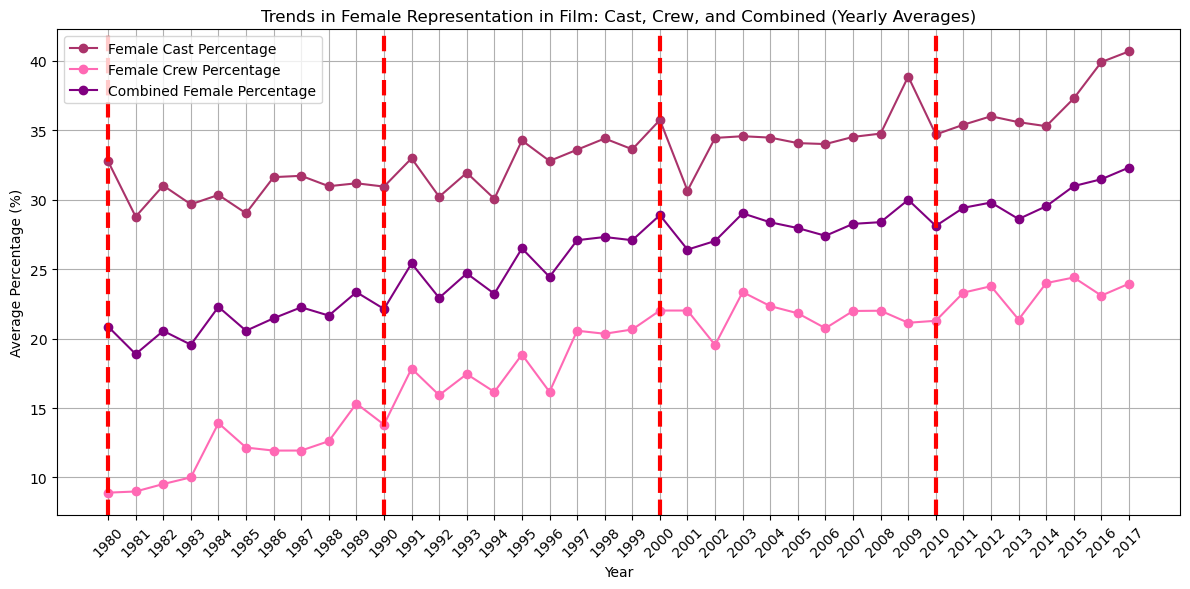

In [107]:
#Start Visualizing


# Group by Year and calculate the mean percent_female_cast and percent_female_crew
grouped_df = refined_df.groupby('Year').agg({
    'percent_female_cast': 'mean',
    'percent_female_crew': 'mean',
    'percent_female_combined': 'mean'
})

# Assuming grouped_df is already defined as per your code
plt.figure(figsize=(12, 6))

# Plotting the lines
plt.plot(grouped_df.index, grouped_df['percent_female_cast'], label='Female Cast Percentage', color='#AA336A', marker='o')
plt.plot(grouped_df.index, grouped_df['percent_female_crew'], label='Female Crew Percentage', color='hotpink', marker='o')
plt.plot(grouped_df.index, grouped_df['percent_female_combined'], label='Combined Female Percentage', color='purple', marker='o')

# Adding vertical lines for the start of each decade
decade_starts = [1980, 1990, 2000, 2010]  # List of decades
for year in decade_starts:
    plt.axvline(x=year, color='red', linestyle='--', linewidth=3)  # Add vertical line


# Adding titles and labels
plt.title('Trends in Female Representation in Film: Cast, Crew, and Combined (Yearly Averages)')
plt.xlabel('Year')
plt.ylabel('Average Percentage (%)')
plt.xticks(grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('female_representation_trends.png')  # Save as PNG

# Show plot
plt.show()




In [108]:
#refined_df_80s
#refined_df_90s
#refined_df_2000s
#refined_df_2010s

percents_80s = refined_df_80s[['Year','percent_female_cast','percent_female_crew','percent_female_combined']]
percents_90s = refined_df_90s[['Year','percent_female_cast','percent_female_crew','percent_female_combined']]
percents_2000s = refined_df_2000s[['Year','percent_female_cast','percent_female_crew','percent_female_combined']]
percents_2010s = refined_df_2010s[['Year','percent_female_cast','percent_female_crew','percent_female_combined']]

percents_80s

# Calculate the average of each column
avg_f_cast_80s, avg_f_crew_80s, avg_f_combined_80s = percents_80s[['percent_female_cast', 'percent_female_crew', 'percent_female_combined']].mean().round(2)
avg_f_cast_90s, avg_f_crew_90s, avg_f_combined_90s = percents_90s[['percent_female_cast', 'percent_female_crew', 'percent_female_combined']].mean().round(2)
avg_f_cast_2000s, avg_f_crew_2000s, avg_f_combined_2000s = percents_2000s[['percent_female_cast', 'percent_female_crew', 'percent_female_combined']].mean().round(2)
avg_f_cast_2010s, avg_f_crew_2010s, avg_f_combined_2010s = percents_2010s[['percent_female_cast', 'percent_female_crew', 'percent_female_combined']].mean().round(2)

print("Percentages by Decade:")
print("--------------------------------------------")

print("Average Female Cast (1980s):", avg_f_cast_80s)
print("Average Female Crew (1980s):", avg_f_crew_80s)
print("Average Female Combined (1980s):", avg_f_combined_80s)

print("--------------------------------------------")

print("Average Female Cast (1990s):", avg_f_cast_90s)
print("Average Female Crew (1990s):", avg_f_crew_90s)
print("Average Female Combined (1990s):", avg_f_combined_90s)

print("--------------------------------------------")

print("Average Female Cast (2000s):", avg_f_cast_2000s)
print("Average Female Crew (2000s):", avg_f_crew_2000s)
print("Average Female Combined (2000s):", avg_f_combined_2000s)

print("--------------------------------------------")

print("Average Female Cast (2010s):", avg_f_cast_2010s)
print("Average Female Crew (2010s):", avg_f_crew_2010s)
print("Average Female Combined (2010s):", avg_f_combined_2010s)




Percentages by Decade:
--------------------------------------------
Average Female Cast (1980s): 30.79
Average Female Crew (1980s): 11.82
Average Female Combined (1980s): 21.32
--------------------------------------------
Average Female Cast (1990s): 32.62
Average Female Crew (1990s): 17.97
Average Female Combined (1990s): 25.25
--------------------------------------------
Average Female Cast (2000s): 34.63
Average Female Crew (2000s): 21.67
Average Female Combined (2000s): 28.16
--------------------------------------------
Average Female Cast (2010s): 36.67
Average Female Crew (2010s): 23.12
Average Female Combined (2010s): 29.92


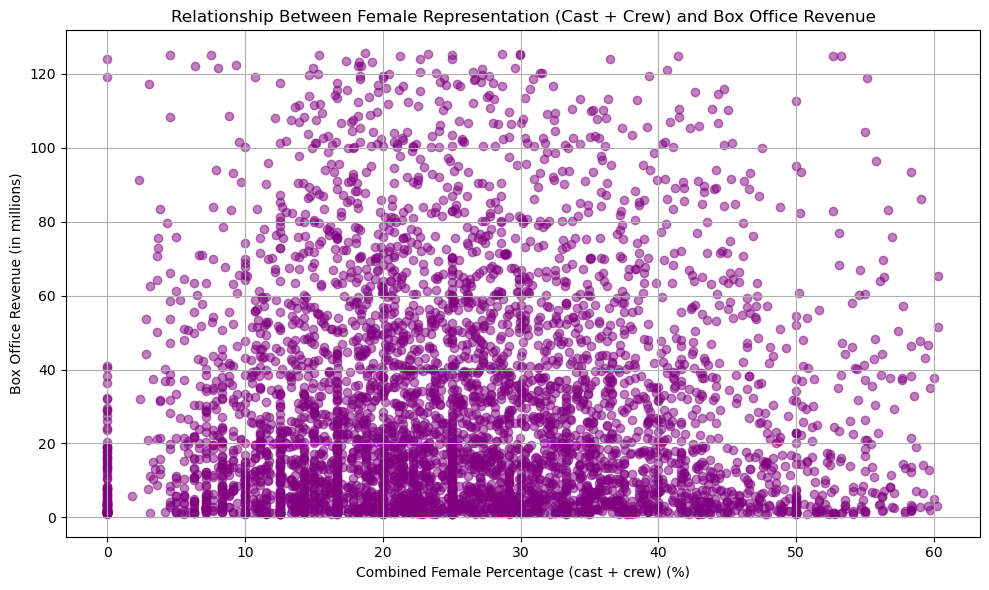

In [109]:
# Convert 'BoxOffice' to millions for the plot
refined_df['BoxOffice_millions'] = refined_df['BoxOffice'] / 1_000_000

# Calculate Q1 and Q3 for 'percent_female_combined' and 'BoxOffice_millions'
Q1_percent = refined_df['percent_female_combined'].quantile(0.25)
Q3_percent = refined_df['percent_female_combined'].quantile(0.75)
IQR_percent = Q3_percent - Q1_percent

Q1_boxoffice = refined_df['BoxOffice_millions'].quantile(0.25)
Q3_boxoffice = refined_df['BoxOffice_millions'].quantile(0.75)
IQR_boxoffice = Q3_boxoffice - Q1_boxoffice

# Define bounds
lower_bound_percent = Q1_percent - 1.5 * IQR_percent
upper_bound_percent = Q3_percent + 1.5 * IQR_percent

lower_bound_boxoffice = Q1_boxoffice - 1.5 * IQR_boxoffice
upper_bound_boxoffice = Q3_boxoffice + 1.5 * IQR_boxoffice

# Filter out the outliers
filtered_df = refined_df[
    (refined_df['percent_female_combined'] >= lower_bound_percent) & 
    (refined_df['percent_female_combined'] <= upper_bound_percent) & 
    (refined_df['BoxOffice_millions'] >= lower_bound_boxoffice) & 
    (refined_df['BoxOffice_millions'] <= upper_bound_boxoffice)
]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with 'percent_female_combined' on x-axis and 'BoxOffice_millions' on y-axis
plt.scatter(filtered_df['percent_female_combined'], filtered_df['BoxOffice_millions'], color='purple', alpha=0.5)

# Adding titles and labels
plt.title('Relationship Between Female Representation (Cast + Crew) and Box Office Revenue')
plt.xlabel('Combined Female Percentage (cast + crew) (%)')
plt.ylabel('Box Office Revenue (in millions)')

# Grid for better visibility
plt.grid(True)

# Show plot
plt.tight_layout()

# Save the plot as an image
plt.savefig('female_representation_trends_boxoffice_scatter.png')  # Save as PNG


plt.show()


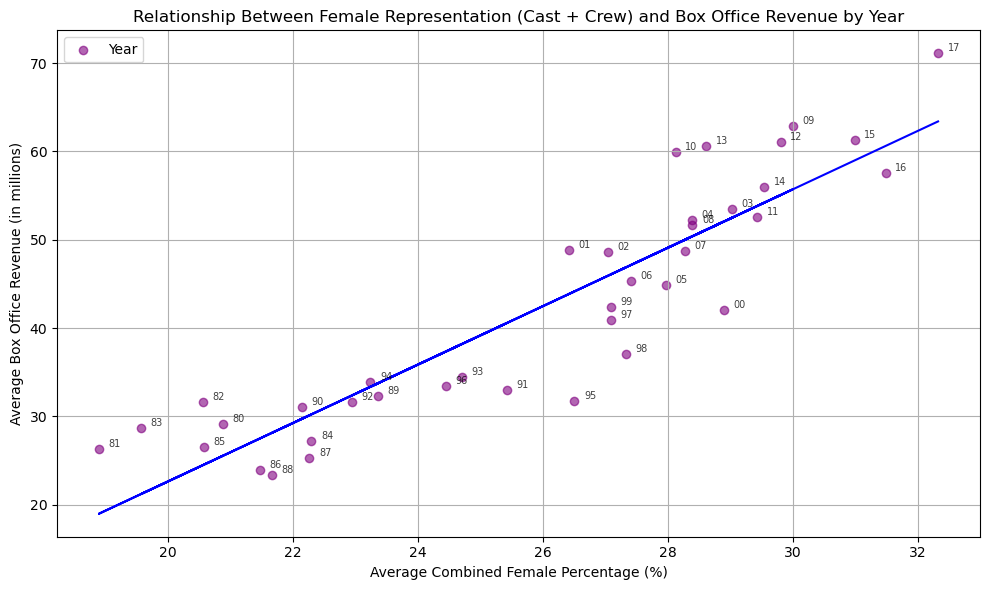

In [110]:
# Convert 'BoxOffice' to millions
refined_df['BoxOffice_millions'] = refined_df['BoxOffice'] / 1_000_000

# Group by Year and calculate the mean for combined female percentage and box office revenue
grouped_df = refined_df.groupby('Year').agg({
    'percent_female_combined': 'mean',
    'BoxOffice_millions': 'mean'
}).reset_index()  # Reset index to access 'Year'

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with 'percent_female_combined' on x-axis and 'BoxOffice_millions' on y-axis
plt.scatter(grouped_df['percent_female_combined'], grouped_df['BoxOffice_millions'], 
            color='purple', alpha=0.6, label="Year")

# Label each dot with the corresponding year
for i, row in grouped_df.iterrows():
    # Format the year to show only the last two digits, e.g., '80 for 1980
    year_short = str(int(row['Year']))[-2:]
    
    # Add the text label to the plot with the formatted year, offsetting the position
    plt.text(row['percent_female_combined'] + 0.35,  # Adjust the x offset (+0.5)
             row['BoxOffice_millions'] + 0,         # Adjust the y offset (+5)
             year_short, 
             fontsize=7, ha='right', va='bottom', alpha=0.75, color='black')


# Perform linear regression to get the slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_df['percent_female_combined'], grouped_df['BoxOffice_millions'])

# Calculate trend line values
trendline = intercept + slope * grouped_df['percent_female_combined']

# Plot the trend line
plt.plot(grouped_df['percent_female_combined'], trendline, color='blue')


# Adding titles and labels
plt.title('Relationship Between Female Representation (Cast + Crew) and Box Office Revenue by Year')
plt.xlabel('Average Combined Female Percentage (%)')
plt.ylabel('Average Box Office Revenue (in millions)')

# Grid for better visibility
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()


# Save the plot as an image
plt.savefig('female_representation_trends_line_year.png')  # Save as PNG


plt.show()
